# Measure the synchronization accuracy of PTP (Precision Time Protocol).

PTP sync offset for add task

In [16]:
import re

def extract_phase_offsets(file_content):
    """Extracts 'Phase Offset' values from a given text content of a file."""
    phase_offsets = []
    # Regular expression to find the 'Phase Offset' values
    matches = re.findall(r"Phase Offset:\s+([0-9.]+)s", file_content)
    phase_offsets.extend([float(match) for match in matches])
    return phase_offsets



In [26]:
import matplotlib.pyplot as plt

def plot_all_phase_offsets_outlier(offsets_dict):
    """Plots a boxplot of phase offsets for each file in a single figure."""
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    num_files = len(offsets_dict)
    if num_files == 0:
        return  # No data to plot

    for index, (filename, offsets) in enumerate(offsets_dict.items(), start=1):
        plt.subplot(1, num_files, index)
        plt.boxplot(offsets, notch=True, patch_artist=True, showfliers=True, whiskerprops={'linewidth':1.5})
        plt.title(f'{filename}')
        plt.ylabel('Phase Offset (seconds)')
    plt.tight_layout()
    plt.show()


def plot_all_phase_offsets(offsets_dict):
    """Plots a boxplot of phase offsets for each file in a single figure."""
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    num_files = len(offsets_dict)
    if num_files == 0:
        return  # No data to plot

    for index, (filename, offsets) in enumerate(offsets_dict.items(), start=1):
        plt.subplot(1, num_files, index)
        plt.boxplot(offsets, notch=True, patch_artist=True, showfliers=False, whiskerprops={'linewidth':1.5})
        plt.title(f'{filename}')
        plt.ylabel('Phase Offset (seconds)')
    plt.tight_layout()
    plt.show()


plot the boxplot with or without outlier value. 

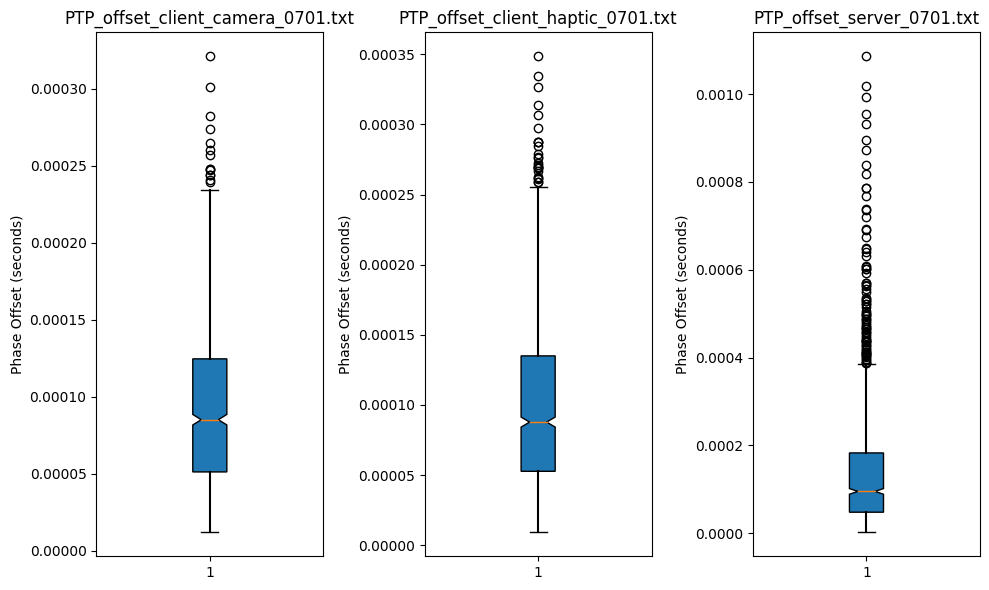

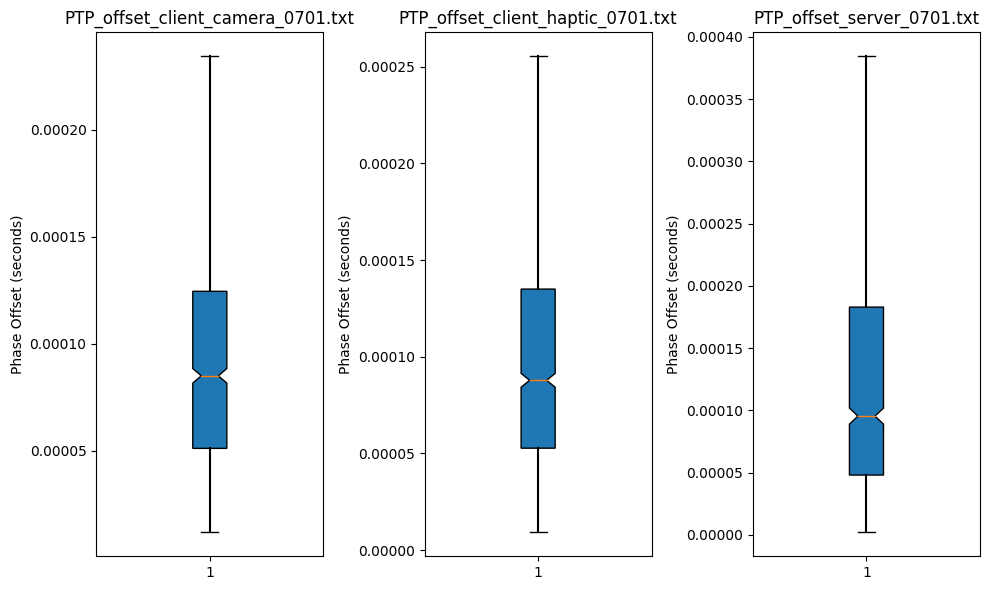

In [27]:
import os

def process_files(directory):
    offsets_dict = {}
    # Walk through all files in the given directory
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):  # assuming the files are .txt files
            filepath = os.path.join(directory, filename)
            # Open the file with utf-8 encoding, considering utf-8-sig for BOM
            with open(filepath, 'r', encoding='utf-16') as file:
                content = file.read()
                offsets = extract_phase_offsets(content)
                if offsets:  # Only add if there are any offsets found
                    offsets_dict[filename] = offsets

    # Plot all collected offsets
    plot_all_phase_offsets_outlier(offsets_dict)
    plot_all_phase_offsets(offsets_dict)

# Call the function with the path to your directory
process_files(r'C:\Users\Administrator\Desktop\Diplom_arbeit\da_multimedia_data\da_multimedia\10times_add_0701\10times_add_0701\PTP_offset')


PTP offset for change task

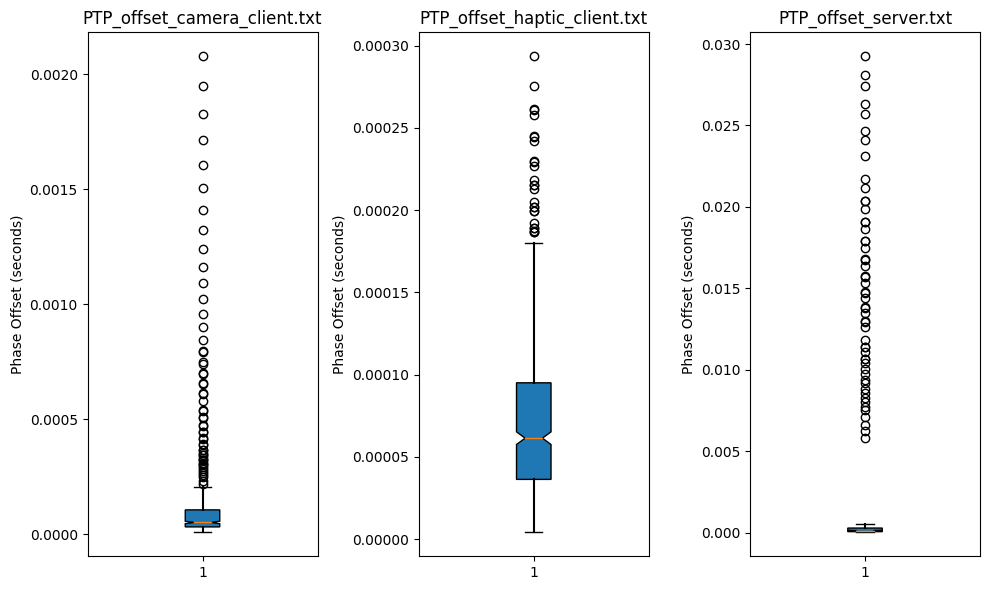

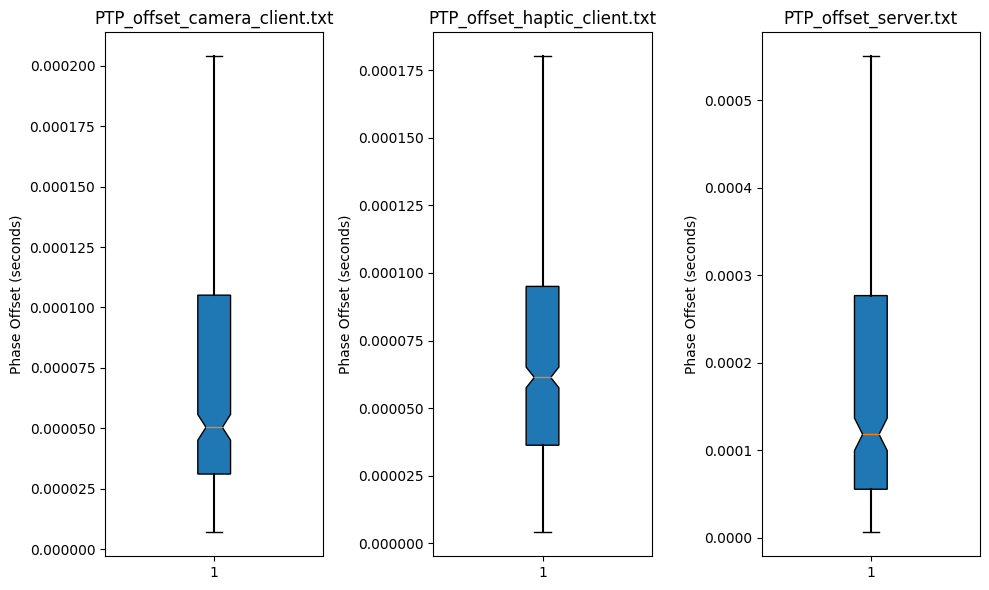

In [28]:
process_files(r'C:\Users\Administrator\Desktop\Diplom_arbeit\da_multimedia_data\da_multimedia\10times_change_0701\10times_change_0701\PTP_offset')